In [50]:
from matplotlib import pyplot as plt
import re
import math
import numpy as np

In [13]:
def split_by_epoch(output):
    s = output.split('===')
    s = [e for e in s if '(train)' in e]
    return s

def get_numbers(s):
    return [float(x) for x in re.findall("\d+\.\d+", s)]

def get_accuracies(output):
    epochs = split_by_epoch(output)
    valid_accs = []
    for e in epochs:
        valid_accs.append(get_numbers(e)[-1])

    return valid_accs

def get_perplexities(output, train=False):
    epochs = split_by_epoch(output)
    pps = []
    for e in epochs:
        i = 1 if train else -2
        pps.append(math.exp(get_numbers(e)[i]))

    return pps


def get_loss(output):
    epochs = split_by_epoch(output)
    pps = []
    for e in epochs:
        pps.append(get_numbers(e)[-2])

    return pps

def get_in_file(transformation_function, file_path):
    with open(file_path, 'r') as f:
        data=f.read()
        return transformation_function(data)

In [5]:
get_in_file(get_perplexities, '../output_files/spn_output.txt')[100]

11.803923780865576

In [81]:
math.exp(2.34597)

10.443397912015204

In [37]:
max_len = 50
def plot(file):
    plt.plot(get_in_file(get_perplexities, file)[:max_len])
def plot_train(file):
    plt.plot(get_in_file(lambda x: get_perplexities(x, train=True), file)[1:max_len])
def plot_train_valid_diff(file):
    plt.plot([x-y for x,y in zip(
        get_in_file(lambda x: get_perplexities(x, train=True), file),
        get_in_file(get_perplexities, file)
        )][1:max_len]
    )

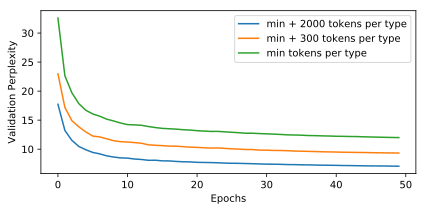

In [214]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline


plt.figure(dpi=1000, figsize=(6,3))
plot('../output_files/2000_pad_spn.txt')
plot('../output_files/300_pad_spn.txt')
plot('../output_files/0_pad_spn.txt')


plt.ylabel('Validation Perplexity')
plt.xlabel('Epochs')
plt.gca().legend(['min' + p +' tokens per type'  for p in (' + 2000', ' + 300', '')] + ['3000 constant'])
plt.tight_layout()
plt.savefig('../figures/different_paddings.png')

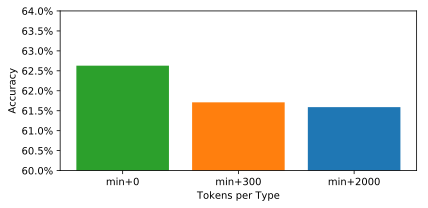

In [215]:
fig, ax = plt.subplots()
padding_accuracies = [62.628483691042035, 61.71, 61.59]
ax.bar(range(len(padding_accuracies)),padding_accuracies, color=['C2','C1','C0'])
ax.set_xticks(range(3))
ax.set_xticklabels(['min+0', 'min+300', 'min+2000'])
ax.set_ybound(lower=60, upper=64)
vals = ax.get_yticks()
ax.set_yticklabels(['{}%'.format(x) for x in vals])
fig.set_dpi(1000)
fig.set_figheight(3)
fig.set_figwidth(6)
ax.set_xlabel('Tokens per Type')
ax.set_ylabel('Accuracy')
plt.tight_layout()
plt.savefig('../figures/different_paddings_acc.png')
plt.show()

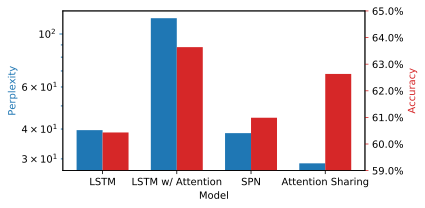

In [233]:
losses = [3.67836117632826, 4.757357020907932, 3.64938874789391, 3.35809196818633] # 3.3195814439866425]
perplexities = np.exp(losses)
accuracies = [60.43342068723669, 63.64024092617252, 60.98645145697781, 62.63274870983182] # 62.77491600282439]
labels = ['LSTM', 'LSTM w/ Attention', 'SPN', 'Attention Sharing']#, 'Masked\nAttention Sharing']
colors = ['tab:blue', 'tab:red']

ind = np.arange(len(labels))  # the x locations for the groups
width = 0.35  # the width of the bars


fig, ax1 = plt.subplots()
ax1.set_axisbelow(True)
ax1.bar(ind - width/2, perplexities, width, color=colors[0], label="Perplexity")
ax1.set_ybound(upper=115, lower=20)
ax1.set_ylabel('Perplexity', color=colors[0])
ax1.set_yscale('log')
ax1.set_xlabel('Model')
ax1.set_xticks(ind)
ax1.tick_params(axis='y', color=colors[0], which='both', width=1)
#ax1.grid(which='both', axis='y', color=colors[0], linestyle='dashed')


ax1.set_xticklabels(labels)
ax2 = ax1.twinx()
ax2.bar(ind + width/2, accuracies, width, color=colors[1], label="Accuracy")
ax2.set_ybound(lower=59, upper=65)
ax2.set_ylabel('Accuracy', color=colors[1])
ax2.tick_params(axis='y', color=colors[1])
vals = ax2.get_yticks()
ax2.set_yticklabels(['{}%'.format(x) for x in vals])
#ax2.grid(color=colors[1], linestyle='dashed')
ax2.set_axisbelow(True)
fig.set_figheight(3)
fig.set_figwidth(6)
fig.set_dpi(500)
fig.tight_layout()
plt.savefig('../figures/architecture_comp.png')
plt.show()

In [234]:
np.exp([3.67836117632826, 4.757357020907932, 3.64938874789391, 3.35809196818633]) # 3.3195814439866425])

array([ 39.58147383, 116.43777625,  38.45115551,  28.73431256])

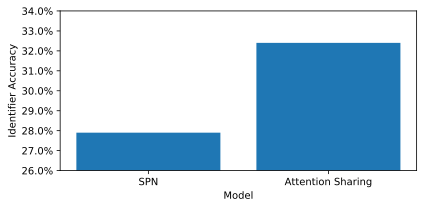

In [217]:
fig, ax = plt.subplots()
id_accuracies = [27.9, 32.4]
ax.bar(range(len(id_accuracies)),id_accuracies)
ax.set_xticks(range(2))
ax.set_xticklabels(['SPN', 'Attention Sharing'])
ax.set_ybound(lower=26, upper=34)
vals = ax.get_yticks()
ax.set_yticklabels(['{}%'.format(x) for x in vals])
fig.set_dpi(1000)
fig.set_figheight(3)
fig.set_figwidth(6)
ax.set_xlabel('Model')
ax.set_ylabel('Identifier Accuracy')
plt.tight_layout()
plt.savefig('../figures/id_acc.png')
plt.show()